# Assembling the genome

In [18]:
library(ggplot2)
library(reshape2)
dat <- read.table('kmers.txt',header=T)  # 15-mer count data
head(dat)
dat2 <- melt(dat,id.vars = c("count")) # re-format data for ggplot

,count,X7,reference
1,1,20734560,12521054
2,2,1589511,875226
3,3,191884,85974
4,4,41657,18512
5,5,26334,5518
6,6,31108,2492


Warning message:
: Removed 19600 rows containing missing values (geom_point).

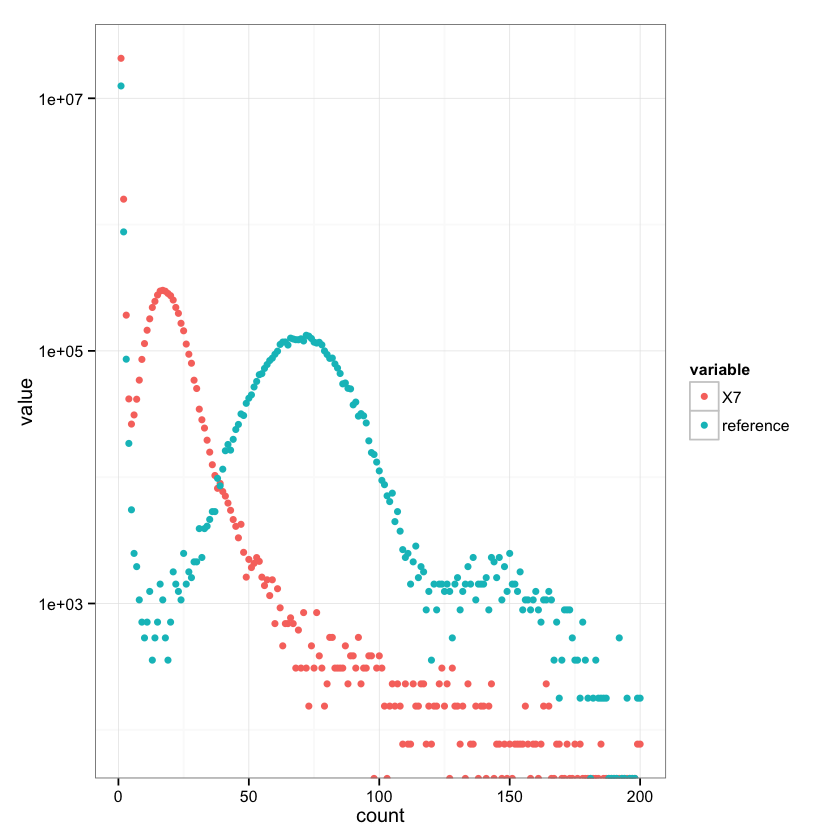

In [19]:
ggplot(dat2,aes(count,value,color=variable))+geom_point()+xlim(1,200)+scale_y_log10()+theme_bw()

## What is the genome size?
- The left side of the plot is just error kmers. The total genome size is the sum of all the kmers, minus the error kmers.

In [21]:
sum(dat$X7) - sum(dat$X7[1:2])
sum(dat$reference) - sum(dat$reference[1:2])

[1] 4748975

[1] 4545586

This is actually pretty close. The actual assembly size is 4.6 mb

## Is the frequency of error kmers different?

In [22]:
sum(dat$X7[1:2])/sum(dat$X7)
sum(dat$reference[1:2])/sum(dat$reference)

[1] 0.8245866

[1] 0.7466492

- Notice that in this data set _most_ of the kmers are error kmers.
  - Why is that?
- This is can actually be a huge problem, and a lot of algorithms exist to 'heal' error kmers

# Assembly strategies

- Overlap-layout-consensus
- De Bruij graph
- 

## Overlap-layout-consensus
![](http://www.biologicalproceduresonline.com/content/figures/1480-9222-11-1-9004-2-l.jpg)

## De Bruijn graph assembly
![](http://www.nature.com/nrg/journal/v12/n10/images/nrg3068-f3.jpg)

## Assessing assembly quality
![](http://www.discoveryandinnovation.com/BIOL202/notes/images/N50_build37d.jpg)

Trying to assemble one of our genomes using the [ABYSS](https://github.com/bcgsc/abyss) assembler:

```
abyss-pe -j 8 name=ecoli k=15 in='../data/reads/7_S3_L001_R1_001.fastq.gz ../data/reads/7_S3_L001_R2_001.fastq.gz'
```